In [17]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


import seaborn as sns
import matplotlib.pyplot as plt

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#D64045',
    'blue': '#1064A8',
    'cyan_light': "#569178",
    'cyan': '#258E62',
    "green": "#007C48",
    'purple': '#582CA1',
    'orange': '#F57F25',
    'yellow': '#FCC427',
    'pink': '#C93679',
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)


In [18]:
df = pd.read_csv("groupped.csv")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,no_mark_flag,review_mark_numeric,review_time,is_credit_product,is_mobile_product
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,False,1,1.263709,True,False
1,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,False,5,2.806039,False,False
2,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,False,5,10.729609,False,False
3,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,False,5,10.434623,False,False
4,2025-02-24 17:48:47,2025-02-24 18:34:06.695,e60a8b542d1ffdfd980e0cd330f9d382,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,тарифы и условия,консультация по продукту,Я пользуюсь услугами Т-банка уже несколько мес...,не указано,M,NaN,NaN,NaN,РФ,Малодоходные,0.0,0.0,0.0,Подростки,False,5,0.755471,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53884,2025-05-23 18:29:43.000,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,Страхование,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,False,5,0.927284,False,False
53885,2025-09-26 10:16:00.000,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,Не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,False,5,3.183989,False,False
53886,2025-10-23 18:41:00.000,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,False,5,0.657835,False,False
53887,2025-09-02 13:12:13.000,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,Премиальные продукты,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,False,5,0.380145,False,False


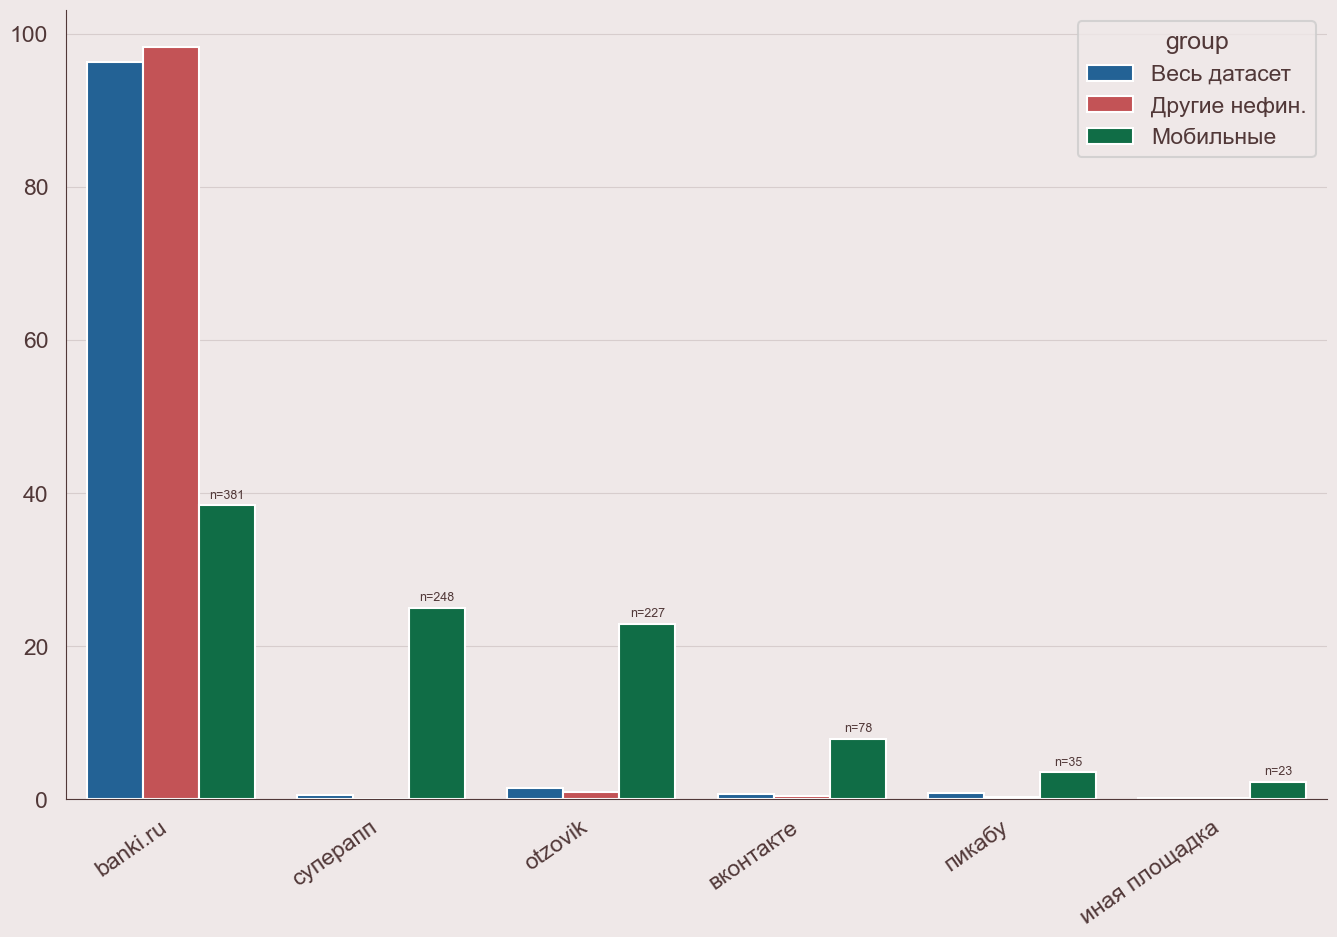

In [19]:
is_mobile = df["is_mobile_product"].fillna(False).astype(bool)
is_other_nonfin = df["company"].ne("Банк") & ~is_mobile

mobile_source_counts = df.loc[is_mobile, "review_source"].value_counts(dropna=False)
top_sources = mobile_source_counts.head(6).index.tolist()
sources_order = top_sources 

def build_source_share(data, group_name) -> pd.DataFrame:
    counts = data["review_source"].value_counts(dropna=False).reindex(sources_order, fill_value=0)
    total_in_top = int(counts.sum())
    share_pct = counts / total_in_top * 100 if total_in_top > 0 else counts.astype(float)

    return pd.DataFrame({
        "group": group_name,
        "review_source": counts.index,
        "reviews_count": counts.values,
        "share_pct": share_pct.values,
    })

plot_data = pd.concat([
    build_source_share(df, "Весь датасет"),
    build_source_share(df.loc[is_other_nonfin], "Другие нефин."),
    build_source_share(df.loc[is_mobile], "Мобильные"),
], ignore_index=True)

plt.figure(figsize=(14, 10))

hue_order = ["Весь датасет", "Другие нефин.", "Мобильные"]
ax = sns.barplot(
    data=plot_data,
    x="review_source",
    y="share_pct",
    hue="group",
    order=sources_order,
    hue_order=hue_order,
    errorbar=None
)

plt.xticks(rotation=35, ha="right")
plt.tight_layout()

mobile_counts = (
    plot_data[plot_data["group"] == "Мобильные"]
    .set_index("review_source")["reviews_count"]
    .reindex(sources_order)
    .fillna(0)
    .astype(int)
    .tolist()
)

plt.xlabel(None)
plt.ylabel(None)
mobile_container = ax.containers[hue_order.index("Мобильные")]
for bar, n in zip(mobile_container, mobile_counts):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(f"n={n}", (x, y), ha="center", va="bottom",
                fontsize=9, xytext=(0, 3), textcoords="offset points")

plt.show()


review_source  reviews_count  source_share_pct  negative_share_pct
     banki.ru            381              37.1                83.5
     суперапп            248              24.1                96.8
      otzovik            227              22.1                95.6
    вконтакте             78               7.6                98.7
       пикабу             35               3.4                97.1
иная площадка             23               2.2                95.7


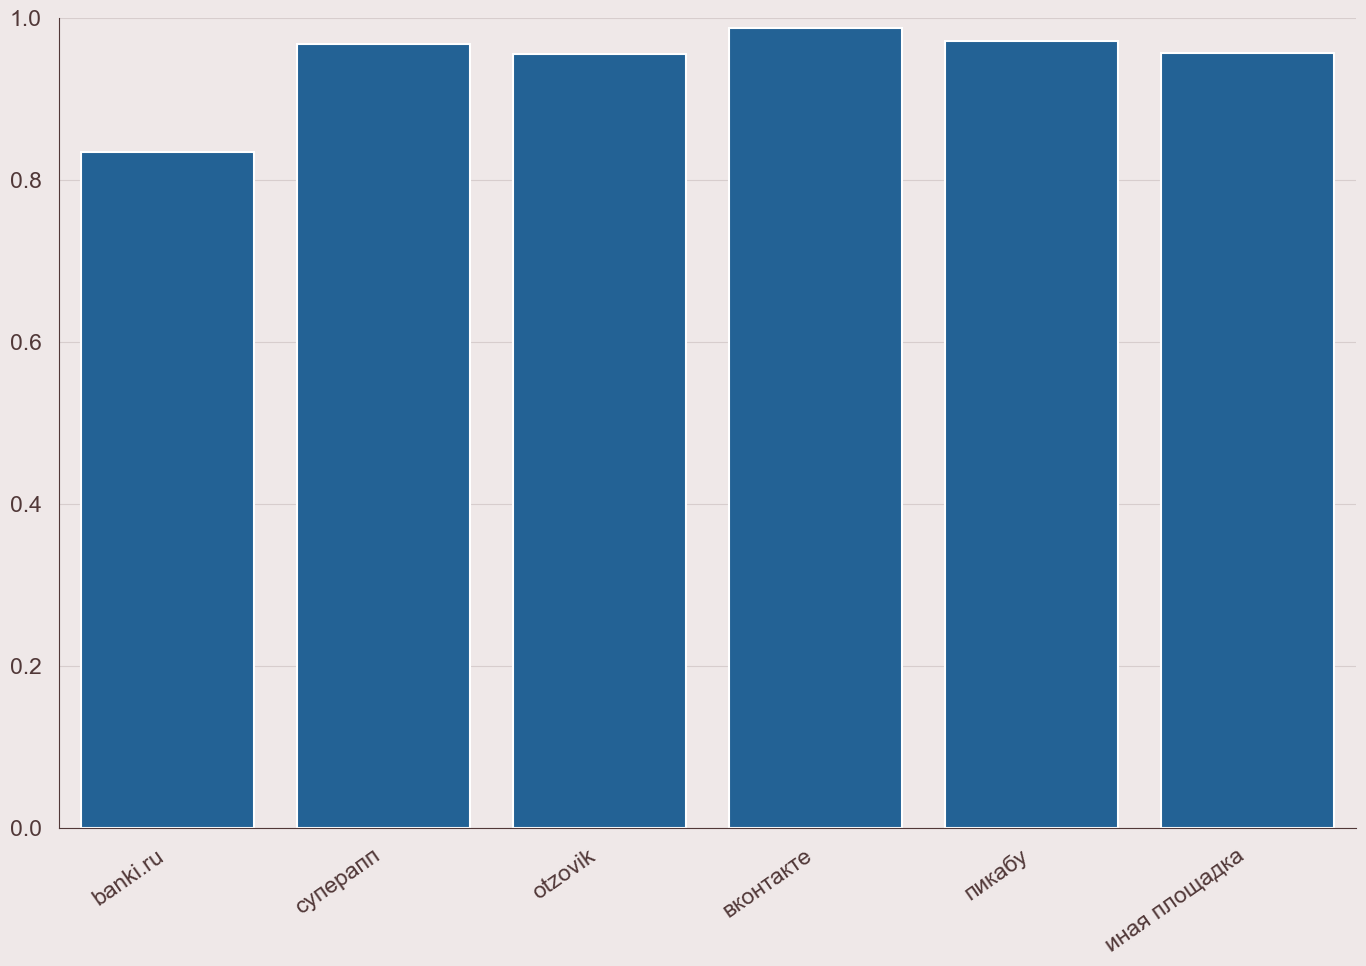

In [20]:
mobile_reviews = df[df["is_mobile_product"].fillna(False).astype(bool)].copy()
mobile_reviews["review_source"] = mobile_reviews["review_source"].fillna("нет").astype(str)

mobile_reviews["review_emotion"] = pd.to_numeric(mobile_reviews["review_emotion"], errors="coerce")
mobile_reviews["is_negative_review"] = mobile_reviews["review_emotion"].eq(0)

source_stats = (
    mobile_reviews
    .groupby("review_source", as_index=False)
    .agg(
        reviews_count=("is_negative_review", "size"),
        negative_share=("is_negative_review", "mean"),
    )
)

source_stats["source_share"] = source_stats["reviews_count"] / source_stats["reviews_count"].sum()

source_stats = source_stats.sort_values("source_share", ascending=False).head(6)

source_stats["negative_share_pct"] = (source_stats["negative_share"] * 100).round(1)
source_stats["source_share_pct"] = (source_stats["source_share"] * 100).round(1)
print(source_stats[["review_source", "reviews_count", "source_share_pct", "negative_share_pct"]].to_string(index=False))

plt.figure(figsize=(14, 10))
sns.barplot(data=source_stats, x="review_source", y="negative_share")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=35, ha="right")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()